# IMPORT DATASET

In [1]:
#1) Delivery_time -> Predict delivery time using sorting time

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
dt=pd.read_csv('delivery_time.csv')


In [4]:
dt.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [5]:
dt.rename(columns={"Delivery Time":"Delivery_Time","Sorting Time":"Sorting_Time"},inplace=True)

In [6]:
dt.columns

Index(['Delivery_Time', 'Sorting_Time'], dtype='object')

In [7]:
dt.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [9]:
dt.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


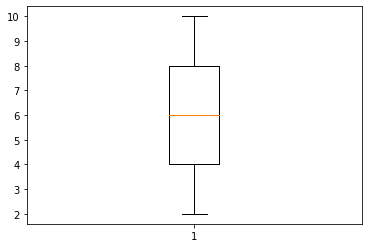

In [10]:
#cheking the outlier present in dataset by using boxplot
plt.boxplot(dt['Sorting_Time'])
plt.show()

In [11]:
dt.columns

Index(['Delivery_Time', 'Sorting_Time'], dtype='object')

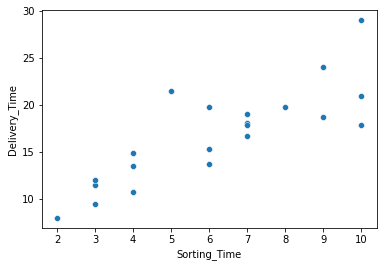

In [12]:
sns.scatterplot(x="Sorting_Time",y="Delivery_Time",data=dt)
plt.show()

# correlation

In [13]:
dt.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [14]:
#another way of finding correlation
#dt["Delivery_Time"].corr(dt["Sorting_Time"])

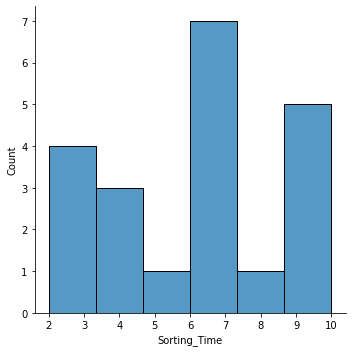

In [15]:
sns.displot(dt['Sorting_Time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


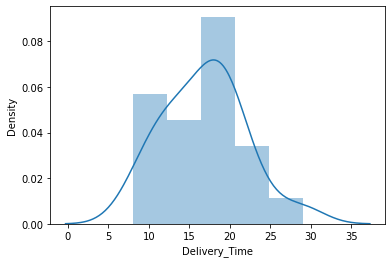

In [16]:
sns.distplot(dt["Delivery_Time"])

# Fitting a regression Model

In [17]:
dt.columns

Index(['Delivery_Time', 'Sorting_Time'], dtype='object')

In [18]:
import statsmodels.formula.api as smf
model=smf.ols("Delivery_Time~Sorting_Time",data=dt).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


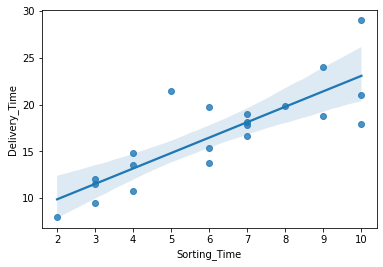

In [19]:
sns.regplot(x="Sorting_Time",y="Delivery_Time",data=dt)

In [20]:
#in these we saw all information about model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           3.98e-06
Time:                        19:29:16   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#coeffient
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [22]:
print(model.tvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64


In [23]:
print(model.pvalues)

Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [24]:
#R-squred Value

In [25]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [26]:
dt.head(5)

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [27]:
pred = model.predict(dt.iloc[:,1])
pd.set_option("display.max_rows", 21) 
rmse_1 = np.sqrt(np.mean((np.array(dt['Delivery_Time'])-np.array(pred))**2))
rmse_1 

2.7916503270617654

Text(0, 0.5, 'Delivery_Time')

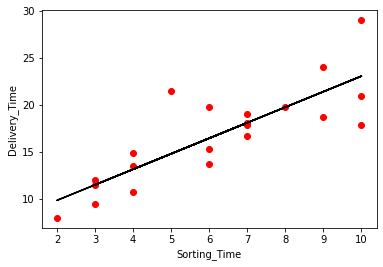

In [28]:
import matplotlib.pylab as plt
plt.scatter(x=dt["Sorting_Time"],y=dt["Delivery_Time"],color='red')
plt.plot(dt["Sorting_Time"],pred,color='black')
plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')

In [29]:

#Transformation for improving the performance of the model

In [30]:
model2 = smf.ols('Delivery_Time~np.log(Sorting_Time)',data=dt).fit()
model2.params
model2.resid 
model2.resid_pearson 


array([-0.34207012, -0.06839109,  0.83061001,  1.0335774 ,  2.44206469,
       -0.70066414,  0.08444506, -0.55504813, -1.42092236, -0.79351107,
       -0.046959  , -1.02543743, -0.72295404,  0.14098557,  0.3254345 ,
        0.41187217, -1.2574911 , -0.22528994,  0.19903082, -0.32273466,
        2.01345289])

In [31]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           2.64e-06
Time:                        19:29:17   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
pred2 = model2.predict(dt.iloc[:,1])
pd.set_option("display.max_rows", 21) 
rmse_2 = np.sqrt(np.mean((np.array(dt['Delivery_Time'])-np.array(pred2))**2))
rmse_2

2.733171476682066

Text(0, 0.5, 'Delivery_Time')

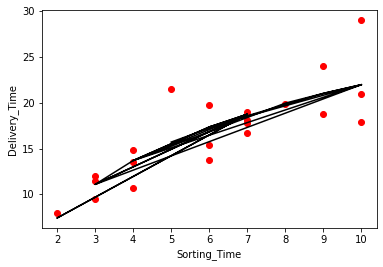

In [33]:
import matplotlib.pylab as plt
plt.scatter(x=dt["Sorting_Time"],y=dt["Delivery_Time"],color='red')
plt.plot(dt["Sorting_Time"],pred2,color='black')
plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')

In [34]:
model3=smf.ols('np.log(Delivery_Time)~Sorting_Time',data=dt).fit()
model3.params


Intercept       2.121372
Sorting_Time    0.105552
dtype: float64

In [35]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Sat, 26 Mar 2022   Prob (F-statistic):           1.59e-06
Time:                           19:29:17   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
pred_log3=model3.predict(dt.iloc[:,1])
pred_log3

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [37]:
pred3=np.exp(pred_log3)

In [38]:

pd.set_option("display.max_rows", 21) 
rmse_2 = np.sqrt(np.mean((np.array(dt['Delivery_Time'])-np.array(pred3))**2))
rmse_2

2.9402503230562007

Text(0, 0.5, 'Delivery_Time')

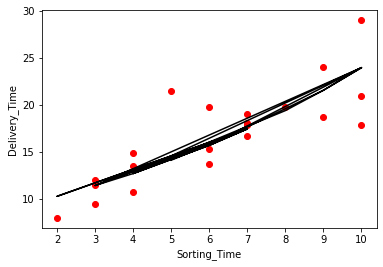

In [39]:
import matplotlib.pylab as plt
plt.scatter(x=dt["Sorting_Time"],y=dt["Delivery_Time"],color='red')
plt.plot(dt["Sorting_Time"],pred3,color='black')
plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')

In [40]:
dt["Sorting_Time_sq"] = dt.Sorting_Time*dt.Sorting_Time
dt

,Delivery_Time,Sorting_Time,Sorting_Time_sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [41]:
model4=smf.ols('np.log(Delivery_Time)~Sorting_Time+Sorting_Time_sq',data=dt).fit()


In [42]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Sat, 26 Mar 2022   Prob (F-statistic):           2.20e-06
Time:                           19:29:17   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6997      0.228      7.441      0.000       1.220       2.180
Sorting_Time        0.2659      0.080      3.315      0.004       0.097       0.434
Sorting_Time_sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
pred_log4=model4.predict(dt)
pred4=np.exp(pred_log4)

In [44]:
rsme_4=np.sqrt(np.mean((np.array(dt["Delivery_Time"])-np.array(pred4))**2))
rsme_4

2.7990419887409317

Text(0, 0.5, 'Delivery_Time')

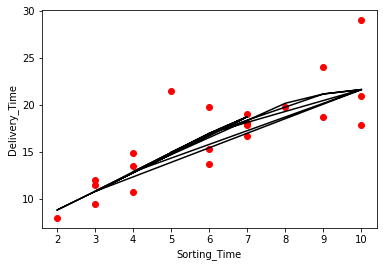

In [45]:
plt.scatter(dt.Sorting_Time,dt.Delivery_Time,color="red")
plt.plot(dt.Sorting_Time,pred4,color='black')
plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')

# Predict For new Data point

In [46]:
#for predicting delivered time 

# Problem No-2

# 2]2) Salary_hike -> Build a prediction model for Salary_hike


In [47]:
s_hike=pd.read_csv("Salary_Data.csv")


In [48]:
s_hike.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [49]:
#we have check the basic information
s_hike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [50]:
s_hike.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


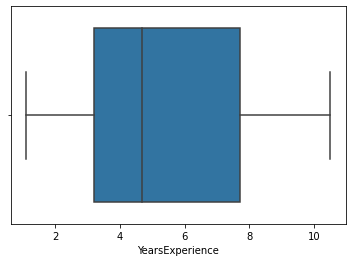

In [51]:
#there is no outlier present in dataset
sns.boxplot(s_hike["YearsExperience"],data=s_hike)
plt.show()

In [52]:
#so now we have check the correlation between year of Experience and Salary Hike

In [53]:
s_hike.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [54]:
#optional for finding the corelation between them
corr1=s_hike["YearsExperience"].corr(s_hike["Salary"])

In [55]:
round(corr1,4)

0.9782

In [56]:
#in the above r>=0.85 is the good model for us

# Fitting the regression model

In [57]:
import statsmodels.formula.api as smf


In [58]:
model2=smf.ols("Salary~YearsExperience",data=s_hike).fit()

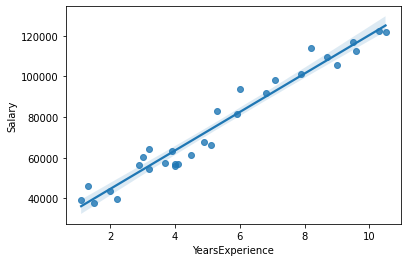

In [59]:
sns.regplot(x="YearsExperience",y="Salary",data=s_hike)

In [60]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           1.14e-20
Time:                        19:29:18   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
model2.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [62]:
#in the above p-value is less than alpha=0.05 we reject the null hypothesis

In [63]:
#as the result salary hike depends on year of experience

# Predict for salary hike

In [64]:
values=pd.Series([8,15,20,10])
values

0     8
1    15
2    20
3    10
dtype: int64

In [65]:
pred_shike=pd.DataFrame(values,columns=["YearsExperience"])


In [66]:
pred_shike

,YearsExperience
0,8
1,15
2,20
3,10


In [67]:
model2.predict(pred_shike)

0    101391.898770
1    167541.635020
2    214791.446628
3    120291.823413
dtype: float64

In [68]:
s_hike.head(8)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
